In [1]:
# IPython directives
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Import stuff
import numpy as np
import tensorflow as tf
import pandas as pd

from tensorflow.contrib.learn import SVM
from tensorflow.contrib.layers import *

from pandas.plotting import scatter_matrix

In [3]:
# Define column names
COLUMNS = ["Id", "SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"]
ID_COLUMN = COLUMNS[0]
FEATURE_COLUMNS = COLUMNS[1:-1]
LABEL_COLUMN = COLUMNS[-1]

In [141]:
# Process input data
data = pd.read_csv('input/Iris.csv', header=0, usecols=COLUMNS, index_col=ID_COLUMN)

data.replace("Iris-setosa", 0, inplace=True)
data.replace("Iris-versicolor", 1, inplace=True)
data.replace("Iris-virginica", 1, inplace=True)

train_data = data[2:-2:2]
test_data = data[3:-2:2]
predict_data = data[:2].append(data[-2:])

train_data.head()
test_data.head()
predict_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
3,4.7,3.2,1.3,0.2,0
5,5.0,3.6,1.4,0.2,0
7,4.6,3.4,1.4,0.3,0
9,4.4,2.9,1.4,0.2,0
11,5.4,3.7,1.5,0.2,0


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
4,4.6,3.1,1.5,0.2,0
6,5.4,3.9,1.7,0.4,0
8,5.0,3.4,1.5,0.2,0
10,4.9,3.1,1.5,0.1,0
12,4.8,3.4,1.6,0.2,0


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
149,6.2,3.4,5.4,2.3,1
150,5.9,3.0,5.1,1.8,1


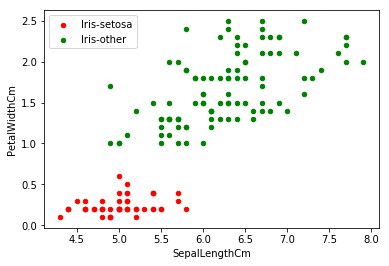

In [54]:
# Draw dataset
x = "SepalLengthCm"
y = "PetalWidthCm"

ax = data[data.Species == 0].plot.scatter(x=x, y=y, color="Red", label="Iris-setosa")
data[data.Species == 1].plot.scatter(x=x, y=y, color="Green", label="Iris-other", ax=ax)

In [149]:
# Define TensorFlow columns
feature_columns = [real_valued_column(i, dtype=tf.float64) for i in FEATURE_COLUMNS]

In [161]:
# Create estimator
estimator = SVM(
    example_id_column=ID_COLUMN,
    feature_columns=feature_columns
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fa2220a44e0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmp5s0vizdp'}


In [121]:
# Provide input functions for estimator
def input_fn(df, include_labels=False):
    features = {
        col: tf.constant(df[col].values)
        for col in [i for i in df.columns if i in FEATURE_COLUMNS]
    }
    if (include_labels):
        features[ID_COLUMN] = tf.constant([str(i) for i in df.index])
        labels = tf.constant([[i] for i in df[LABEL_COLUMN].values])
        return features, labels
    else:
        return features


def input_train():
    return input_fn(train_data, True)


def input_test():
    return input_fn(test_data, True)


def input_predict():
    return input_fn(predict_data)

In [123]:
# Train!
estimator.fit(input_fn=input_train, steps=30)
accuracy = estimator.evaluate(input_fn=input_test, steps=1)['accuracy']

INFO:tensorflow:Created variable linear/bias_weight:0, with device=
Instructions for updating:
Use tf.losses.hinge_loss instead. Note that the order of the predictions and labels arguments were changed.
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /tmp/tmp4hnhwze9/model.ckpt-90
INFO:tensorflow:Saving checkpoints for 91 into /tmp/tmp4hnhwze9/model.ckpt.
INFO:tensorflow:loss = 0.000274577, step = 91
INFO:tensorflow:Saving checkpoints for 120 into /tmp/tmp4hnhwze9/model.ckpt.
INFO:tensorflow:Loss for final step: 0.00010327.


SVM(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinarySvmHead object at 0x7fa222fdb748>, 'feature_columns': [_RealValuedColumn(column_name='SepalLengthCm', dimension=1, default_value=None, dtype=tf.float64, normalizer=None), _RealValuedColumn(column_name='SepalWidthCm', dimension=1, default_value=None, dtype=tf.float64, normalizer=None), _RealValuedColumn(column_name='PetalLengthCm', dimension=1, default_value=None, dtype=tf.float64, normalizer=None), _RealValuedColumn(column_name='PetalWidthCm', dimension=1, default_value=None, dtype=tf.float64, normalizer=None)], 'optimizer': <tensorflow.contrib.linear_optimizer.python.sdca_optimizer.SDCAOptimizer object at 0x7fa222fe4c18>, 'weight_column_name': None, 'update_weights_hook': <tensorflow.contrib.learn.python.learn.estimators.linear._SdcaUpdateWeightsHook object at 0x7fa222fdb390>})

INFO:tensorflow:Created variable linear/bias_weight:0, with device=
Instructions for updating:
Use tf.losses.hinge_loss instead. Note that the order of the predictions and labels arguments were changed.
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Starting evaluation at 2017-07-28-14:41:30
INFO:tensorflow:Restoring parameters from /tmp/tmp4hnhwze9/model.ckpt-120
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2017-07-28-14:41:30
INFO:tensorflow:Saving dict for global step 120: accuracy = 1.0, global_step = 120, loss = 0.00418063


In [148]:
# Let's predict some values
for i in estimator.predict(input_fn=input_predict): i

INFO:tensorflow:Created variable linear/bias_weight:0, with device=
INFO:tensorflow:Restoring parameters from /tmp/tmp4hnhwze9/model.ckpt-120


{'classes': 0, 'logits': array([-1.58302498], dtype=float32)}

{'classes': 0, 'logits': array([-1.3245275], dtype=float32)}

{'classes': 1, 'logits': array([ 2.91351008], dtype=float32)}

{'classes': 1, 'logits': array([ 2.6838429], dtype=float32)}